In [1]:
import ROOT
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import mplhep as hep

Welcome to JupyROOT 6.30/04


In [2]:
df = uproot.open("/eos/user/s/sblancof/SWAN_projects/HWW_helicity/PolarizationLimits/higgsCombineTest.MultiDimFit.mH125_r2_25.root")

In [3]:
df["limit"].keys()

['limit',
 'limitErr',
 'mh',
 'syst',
 'iToy',
 'iSeed',
 'iChannel',
 't_cpu',
 't_real',
 'quantileExpected',
 'r_LL',
 'r_TT',
 'deltaNLL']

In [2]:
ff = ROOT.TFile.Open("/eos/user/s/sblancof/SWAN_projects/HWW_helicity/PolarizationLimits/higgsCombine_limits_2D_225.root")
limit = ff.Get("limit")


In [3]:
r_1 = "r_LL"
r_2 = "r_TT"
whatToDraw = ROOT.Form(f"{r_1}:{r_2}:2*deltaNLL")

n =  limit.Draw(whatToDraw,"1", "colz")
graphScan = ROOT.TGraph2D(n,limit.GetV1(),limit.GetV2(),limit.GetV3())

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [4]:
th2 = graphScan.GetHistogram()


In [5]:
x = []
xx = []
y = []
yy = []
nx = th2.GetXaxis().GetNbins()
ny = th2.GetYaxis().GetNbins()

matrix = 10*np.ones([nx-1, ny-1])

for i in range(1, nx):
    x.append(th2.GetXaxis().GetBinLowEdge(i))
    x.append(th2.GetXaxis().GetBinUpEdge(i))
    xx.append(th2.GetXaxis().GetBinCenter(i))
for j in range(1, ny):
    y.append(th2.GetYaxis().GetBinLowEdge(j))
    y.append(th2.GetYaxis().GetBinUpEdge(j))
    yy.append(th2.GetYaxis().GetBinCenter(j))
    
x = np.unique(np.array(x)) 
y = np.unique(np.array(y)) 

for i in range(1, nx):
    for j in range(1, ny):
        matrix[i-1,j-1] = th2.GetBinContent(i, j)
            


In [16]:
x

array([0.03515625, 0.08964844, 0.14414062, 0.19863281, 0.253125  ,
       0.30761719, 0.36210937, 0.41660156, 0.47109375, 0.52558594,
       0.58007812, 0.63457031, 0.6890625 , 0.74355469, 0.79804687,
       0.85253906, 0.90703125, 0.96152344, 1.01601563, 1.07050781,
       1.125     , 1.17949219, 1.23398437, 1.28847656, 1.34296875,
       1.39746094, 1.45195312, 1.50644531, 1.5609375 , 1.61542969,
       1.66992188, 1.72441406, 1.77890625, 1.83339844, 1.88789062,
       1.94238281, 1.996875  , 2.05136719, 2.10585938, 2.16035156])

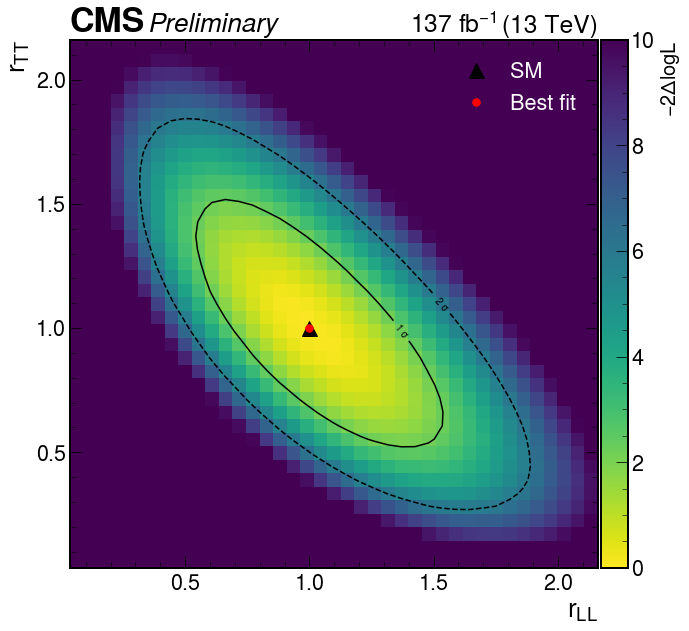

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

hep.style.use("CMS")

fig, ax = plt.subplots()
hep.cms.label("Preliminary", ax=ax, data=True, loc=0)
hep.cms.lumitext("137 $fb^{-1}$               ", ax=ax)

xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

limit2D = ax.imshow(matrix, cmap='viridis_r', vmin=0, vmax=10, origin='lower', extent=[xmin, xmax, ymin, ymax])
CL = ax.contour(matrix, [2.30, 5.99], colors=['black', 'black'], linestyles=['solid', 'dashed'], 
                origin='lower', extent=[xmin, xmax, ymin, ymax])

fmt = {}
fmt[2.30] = "1 $\sigma$"
fmt[5.99] = "2 $\sigma$"
#CL.collections[0].set_label("1 $\sigma$")
#CL.collections[1].set_label("2 $\sigma$")
plt.clabel(CL, fmt=fmt, inline=2, fontsize=10)

ax.plot([1], [1], '^', color='black', markersize=15, label="SM")
ax.plot([1], [1], '.', color='r', markersize=15, label="Best fit")

ax.set_ylabel("$r_{TT}$")
ax.set_xlabel("$r_{LL}$")

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(limit2D, cax=cax, orientation='vertical')

fig.get_axes()[-1].set_ylabel('$- 2 \Delta logL$', fontsize=20)

x_ticks = ax.get_xticks()
ax.set_yticks(x_ticks[1:-1])

l = ax.legend()
for text in l.get_texts():
    text.set_color("white")

plt.savefig("CMS_limitsPolarization_2D_r_0_225.pdf")

# Profiled 1D

In [8]:
df = uproot.open("/eos/user/s/sblancof/SWAN_projects/HWW_helicity/PolarizationLimits/higgsCombine_limits_2D_225.root")



In [9]:
deltaNLL = df["limit"]["deltaNLL"].array()
r_LL = df["limit"]["r_TT"].array()
deltaNLL_2 = 2*deltaNLL


x = np.unique(r_LL)
y = np.zeros(len(x))

for i in range(len(x)):
    
    indices = np.where(r_LL==x[i])[0]
    logL = deltaNLL_2[indices]
    y[i] = np.min(logL)
    

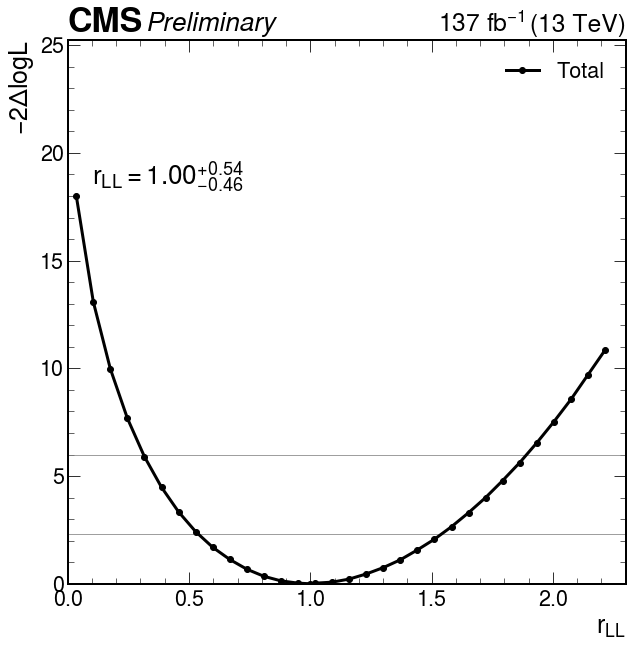

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import LineString

hep.style.use("CMS")

fig, ax = plt.subplots()
hep.cms.label("Preliminary", ax=ax, data=True, loc=0)
hep.cms.lumitext("137 $fb^{-1}$               ", ax=ax)

plt.plot(x, y, color='k', marker='o', label = "Total", zorder=10, linewidth=3)

# confidence levels for 2 variables: https://pdg.lbl.gov/2018/reviews/rpp2018-rev-statistics.pdf

plt.plot([0.0, 2.3], [2.3, 2.3], linewidth='0.75', markersize=0.0, color='gray')
plt.plot([0.0, 2.3], [5.99, 5.99], linewidth='0.75', markersize=0.0, color='gray')

ax.set_ylabel('$- 2 \Delta logL$', fontsize=25)
ax.set_xlabel("$r_{LL}$", fontsize=25)

r_LL_min = x[np.where(y==np.min(y))[0]]
first_line = LineString(np.column_stack((x, y)))
second_line = LineString(np.column_stack(([0.0, 2.3], [2.3, 2.3])))  # 68% confidence level
intersection = first_line.intersection(second_line)
x_68, y_68 = LineString(intersection).xy

r_up = x_68[1] - r_LL_min
r_do = r_LL_min - x_68[0]

plt.text(0.1, 18.5, "$r_{LL} = 1.00^{+ %.2f}_{- %.2f}$" % (r_up[0], r_do[0]), font="TeX Gyre Heros")

ax.set_ylim(bottom=0, top=1.4*np.max(y))
ax.set_xlim([0, 2.3])

l = ax.legend()

#plt.savefig(".pdf")

In [12]:
deltaNLL = df["limit"]["deltaNLL"].array()
r_LL = df["limit"]["r_TT"].array()
deltaNLL_2 = 2*deltaNLL
x = np.unique(r_LL)
y = np.zeros(len(x))
for i in range(len(x)):
    indices = np.where(r_LL==x[i])[0]
    logL = deltaNLL_2[indices]
    y[i] = np.min(logL)

In [13]:
r_up = x_68[1] - r_LL_min
r_do = r_LL_min - x_68[0]
print(r_up)
print(r_do)

[0.54]
[0.461]


In [ ]:
0.339
0.305

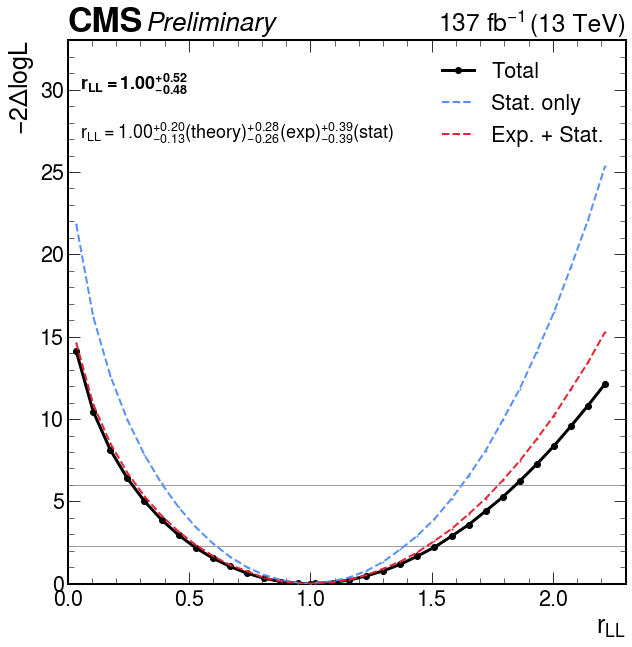

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import LineString

df = uproot.open("/eos/user/s/sblancof/SWAN_projects/HWW_helicity/PolarizationLimits/higgsCombine_limits_2D_225.root")
df_stat = uproot.open("/eos/user/s/sblancof/SWAN_projects/HWW_helicity/PolarizationLimits/higgsCombine_limits_2D_225_stat.root")
df_exp = uproot.open("/eos/user/s/sblancof/SWAN_projects/HWW_helicity/PolarizationLimits/higgsCombine_limits_2D_225_exp.root")


deltaNLL = df["limit"]["deltaNLL"].array()
r_LL = df["limit"]["r_LL"].array()
deltaNLL_2 = 2*deltaNLL
x = np.unique(r_LL)
y = np.zeros(len(x))
for i in range(len(x)):
    indices = np.where(r_LL==x[i])[0]
    logL = deltaNLL_2[indices]
    y[i] = np.min(logL)
    
    
deltaNLL_stat = df_stat["limit"]["deltaNLL"].array()
r_LL_stat = df_stat["limit"]["r_LL"].array()
deltaNLL_2_stat = 2*deltaNLL_stat
x_stat = np.unique(r_LL_stat)
y_stat = np.zeros(len(x_stat))
for i in range(len(x_stat)):
    indices_stat = np.where(r_LL_stat==x_stat[i])[0]
    logL_stat = deltaNLL_2_stat[indices_stat]
    y_stat[i] = np.min(logL_stat)
    
    
deltaNLL_exp = df_exp["limit"]["deltaNLL"].array()
r_LL_exp = df_exp["limit"]["r_LL"].array()
deltaNLL_2_exp = 2*deltaNLL_exp
x_exp = np.unique(r_LL_exp)
y_exp = np.zeros(len(x_exp))
for i in range(len(x_exp)):
    indices_exp = np.where(r_LL_exp==x_exp[i])[0]
    logL_exp = deltaNLL_2_exp[indices_exp]
    y_exp[i] = np.min(logL_exp)
    
    

### Plot

hep.style.use("CMS")

fig, ax = plt.subplots()
hep.cms.label("Preliminary", ax=ax, data=True, loc=0)
hep.cms.lumitext("137 $fb^{-1}$               ", ax=ax)

plt.plot(x, y, color='k', marker='o', label = "Total", zorder=10, linewidth=3)
plt.plot(x_stat, y_stat, color='#5790fc', marker='o', label = "Stat. only", zorder=10, linewidth=2, markersize=1, linestyle="dashed")
plt.plot(x_exp, y_exp, color='#e42536', marker='o', label = "Exp. + Stat.", zorder=10, linewidth=2, markersize=1, linestyle="dashed")


# confidence levels for 2 variables: https://pdg.lbl.gov/2018/reviews/rpp2018-rev-statistics.pdf

plt.plot([0.0, 2.3], [2.3, 2.3], linewidth='0.75', markersize=0.0, color='gray')
plt.plot([0.0, 2.3], [5.99, 5.99], linewidth='0.75', markersize=0.0, color='gray')

ax.set_ylabel('$- 2 \Delta logL$', fontsize=25)
ax.set_xlabel("$r_{LL}$", fontsize=25)

r_LL_min = x[np.where(y==np.min(y))[0]]
first_line = LineString(np.column_stack((x, y)))
second_line = LineString(np.column_stack(([0.0, 2.3], [2.3, 2.3])))  # 68% confidence level
intersection = first_line.intersection(second_line)
x_68, y_68 = LineString(intersection).xy

r_LL_min_stat = x_stat[np.where(y_stat==np.min(y_stat))[0]]
first_line_stat = LineString(np.column_stack((x_stat, y_stat)))
second_line_stat = LineString(np.column_stack(([0.0, 2.3], [2.3, 2.3])))  # 68% confidence level
intersection_stat = first_line_stat.intersection(second_line_stat)
x_68_stat, y_68_stat = LineString(intersection_stat).xy

r_LL_min_exp = x_exp[np.where(y_exp==np.min(y_exp))[0]]
first_line_exp = LineString(np.column_stack((x_exp, y_exp)))
second_line_exp = LineString(np.column_stack(([0.0, 2.3], [2.3, 2.3])))  # 68% confidence level
intersection_exp = first_line_exp.intersection(second_line_exp)
x_68_exp, y_68_exp = LineString(intersection_exp).xy

r_up = x_68[1] - r_LL_min
r_do = r_LL_min - x_68[0]

r_up_stat = x_68_stat[1] - r_LL_min
r_do_stat = r_LL_min - x_68_stat[0]

r_up_exp = x_68_exp[1] - r_LL_min
r_do_exp = r_LL_min - x_68_exp[0]

r_exp_up = np.sqrt(r_up_exp*r_up_exp - r_up_stat*r_up_stat)
r_exp_do = np.sqrt(r_do_exp*r_do_exp - r_do_stat*r_do_stat)

r_theo_up = np.sqrt(r_up*r_up - r_up_exp*r_up_exp)
r_theo_do = np.sqrt(r_do*r_do - r_do_exp*r_do_exp)

plt.text(0.05, 30, "$r_{LL} = 1.00^{+ %.2f}_{- %.2f}$" % (r_up[0], r_do[0]), font="TeX Gyre Heros", fontsize=18, fontweight="bold")
plt.text(0.05, 27, "$r_{LL} = 1.00^{+ %.2f}_{- %.2f}(theory)^{+ %.2f}_{- %.2f}(exp)^{+ %.2f}_{- %.2f}(stat)$" 
         % (r_theo_up[0], r_theo_do[0], r_exp_up[0], r_exp_do[0], r_up_stat[0], r_do_stat[0]), font="TeX Gyre Heros", fontsize=18)

ax.set_ylim(bottom=0, top=33)
ax.set_xlim([0, 2.3])

l = ax.legend()
    

plt.savefig("CMS_limitsPolarization_r_LL.pdf")


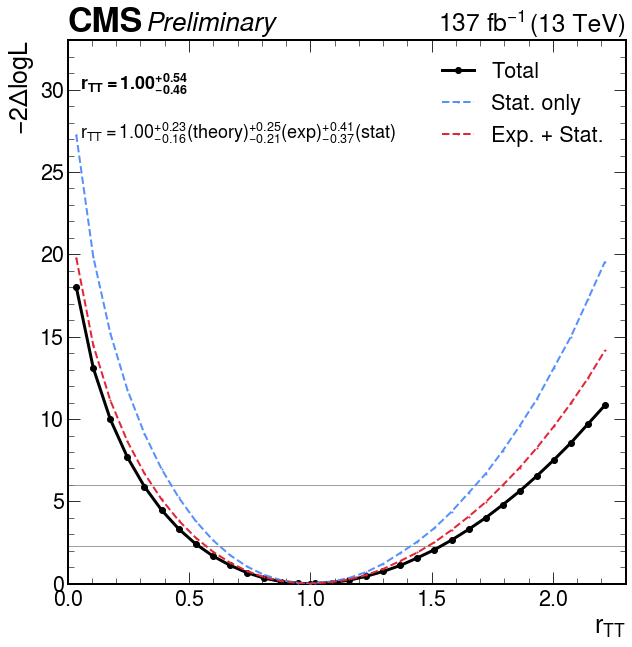

In [15]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import LineString

df = uproot.open("/eos/user/s/sblancof/SWAN_projects/HWW_helicity/PolarizationLimits/higgsCombine_limits_2D_225.root")
df_stat = uproot.open("/eos/user/s/sblancof/SWAN_projects/HWW_helicity/PolarizationLimits/higgsCombine_limits_2D_225_stat.root")
df_exp = uproot.open("/eos/user/s/sblancof/SWAN_projects/HWW_helicity/PolarizationLimits/higgsCombine_limits_2D_225_exp.root")

deltaNLL = df["limit"]["deltaNLL"].array()
r_TT = df["limit"]["r_TT"].array()
deltaNLL_2 = 2*deltaNLL
x = np.unique(r_TT)
y = np.zeros(len(x))
for i in range(len(x)):
    indices = np.where(r_TT==x[i])[0]
    logL = deltaNLL_2[indices]
    y[i] = np.min(logL)
    
    
deltaNLL_stat = df_stat["limit"]["deltaNLL"].array()
r_TT_stat = df_stat["limit"]["r_TT"].array()
deltaNLL_2_stat = 2*deltaNLL_stat
x_stat = np.unique(r_TT_stat)
y_stat = np.zeros(len(x_stat))
for i in range(len(x_stat)):
    indices_stat = np.where(r_TT_stat==x_stat[i])[0]
    logL_stat = deltaNLL_2_stat[indices_stat]
    y_stat[i] = np.min(logL_stat)
    
    
deltaNLL_exp = df_exp["limit"]["deltaNLL"].array()
r_TT_exp = df_exp["limit"]["r_TT"].array()
deltaNLL_2_exp = 2*deltaNLL_exp
x_exp = np.unique(r_TT_exp)
y_exp = np.zeros(len(x_exp))
for i in range(len(x_exp)):
    indices_exp = np.where(r_TT_exp==x_exp[i])[0]
    logL_exp = deltaNLL_2_exp[indices_exp]
    y_exp[i] = np.min(logL_exp)
    
    

### Plot

hep.style.use("CMS")

fig, ax = plt.subplots()
hep.cms.label("Preliminary", ax=ax, data=True, loc=0)
hep.cms.lumitext("137 $fb^{-1}$               ", ax=ax)

plt.plot(x, y, color='k', marker='o', label = "Total", zorder=10, linewidth=3)
plt.plot(x_stat, y_stat, color='#5790fc', marker='o', label = "Stat. only", zorder=10, linewidth=2, markersize=1, linestyle="dashed")
plt.plot(x_exp, y_exp, color='#e42536', marker='o', label = "Exp. + Stat.", zorder=10, linewidth=2, markersize=1, linestyle="dashed")


# confidence levels for 2 variables: https://pdg.lbl.gov/2018/reviews/rpp2018-rev-statistics.pdf

plt.plot([0.0, 2.3], [2.3, 2.3], linewidth='0.75', markersize=0.0, color='gray')
plt.plot([0.0, 2.3], [5.99, 5.99], linewidth='0.75', markersize=0.0, color='gray')

ax.set_ylabel('$- 2 \Delta logL$', fontsize=25)
ax.set_xlabel("$r_{TT}$", fontsize=25)

r_TT_min = x[np.where(y==np.min(y))[0]]
first_line = LineString(np.column_stack((x, y)))
second_line = LineString(np.column_stack(([0.0, 2.3], [2.3, 2.3])))  # 68% confidence level
intersection = first_line.intersection(second_line)
x_68, y_68 = LineString(intersection).xy

first_line_stat = LineString(np.column_stack((x_stat, y_stat)))
second_line_stat = LineString(np.column_stack(([0.0, 2.3], [2.3, 2.3])))  # 68% confidence level
intersection_stat = first_line_stat.intersection(second_line_stat)
x_68_stat, y_68_stat = LineString(intersection_stat).xy

first_line_exp = LineString(np.column_stack((x_exp, y_exp)))
second_line_exp = LineString(np.column_stack(([0.0, 2.3], [2.3, 2.3])))  # 68% confidence level
intersection_exp = first_line_exp.intersection(second_line_exp)
x_68_exp, y_68_exp = LineString(intersection_exp).xy

r_up = x_68[1] - r_TT_min
r_do = r_TT_min - x_68[0]

r_up_stat = x_68_stat[1] - r_TT_min
r_do_stat = r_TT_min - x_68_stat[0]

r_up_exp = x_68_exp[1] - r_TT_min
r_do_exp = r_TT_min - x_68_exp[0]

r_exp_up = np.sqrt(r_up_exp*r_up_exp - r_up_stat*r_up_stat)
r_exp_do = np.sqrt(r_do_exp*r_do_exp - r_do_stat*r_do_stat)

r_theo_up = np.sqrt(r_up*r_up - r_up_exp*r_up_exp)
r_theo_do = np.sqrt(r_do*r_do - r_do_exp*r_do_exp)

plt.text(0.05, 30, "$r_{TT} = 1.00^{+ %.2f}_{- %.2f}$" % (r_up[0], r_do[0]), font="TeX Gyre Heros", fontsize=18, fontweight="bold")
plt.text(0.05, 27, "$r_{TT} = 1.00^{+ %.2f}_{- %.2f}(theory)^{+ %.2f}_{- %.2f}(exp)^{+ %.2f}_{- %.2f}(stat)$" 
         % (r_theo_up[0], r_theo_do[0], r_exp_up[0], r_exp_do[0], r_up_stat[0], r_do_stat[0]), font="TeX Gyre Heros", fontsize=18)

ax.set_ylim(bottom=0, top=33)
ax.set_xlim([0, 2.3])

l = ax.legend()


plt.savefig("CMS_limitsPolarization_r_TT.pdf")